In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

In [2]:
# Study data files
mouse_metadata_path = Path('.','data','Mouse_metadata.csv')
study_results_path = Path('.','data','Study_results.csv')

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_result = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
                                 
# Display the data table for preview
mouse_metadata_result.head()                             

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
Mice_count =len(mouse_metadata_result["Mouse ID"].unique())
Mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
Mice_df = mouse_metadata_result.set_index("Mouse ID")["Timepoint"].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Mice_df

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [6]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Mice_duplicate_df = mouse_metadata_result[mouse_metadata_result.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
Mice_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mice_non_duplicate_df = mouse_metadata_result[~mouse_metadata_result.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
Mice_non_duplicate_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
Mice_count =len(Mice_non_duplicate_df["Mouse ID"].unique())
Mice_count

249

# Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Mice_dup = mouse_metadata_result

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean= Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var=Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev= Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err=Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
stats_summ=pd.DataFrame({ "Mean Tumor Volume":mean, 
             "Median Tumor Volume":median, 
             "Tumor Volume Variance":var,
             "Tumor Volume Std. Dev":std_dev, 
             "Tumor Volume Std. Err.":std_err})

stats_summ

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summ_agg = Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean=('mean'),
    median=('median'),
    var=('var'),
    std=('std'),
    sem=('sem')
)

stats_summ_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


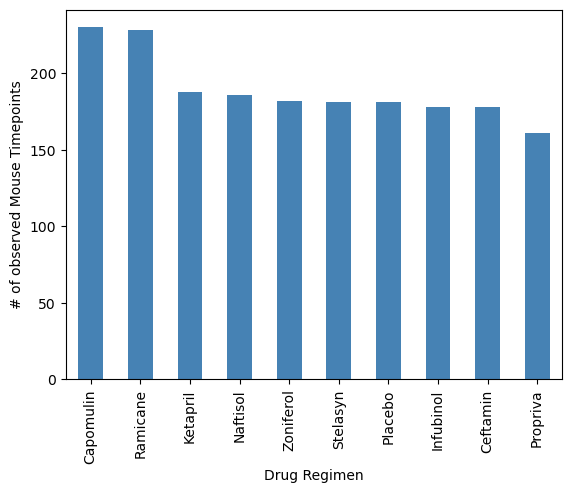

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = Mice_dup['Drug Regimen'].value_counts()

counts.plot(kind='bar', color='steelblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

plt.show()

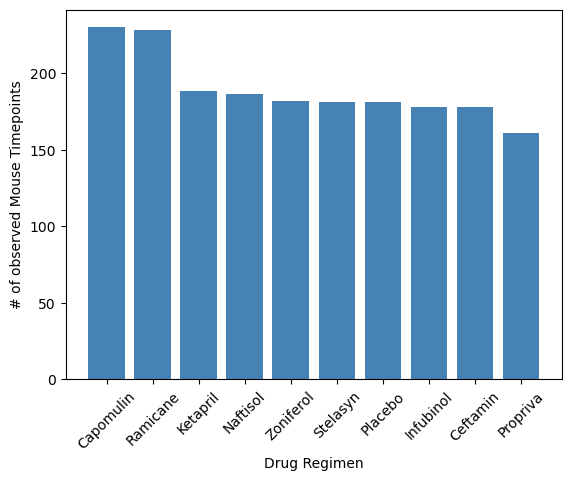

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = Mice_dup['Drug Regimen'].value_counts()

plt.bar(counts.index, counts.values, color='steelblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')


# Rotate the x-axis labels for better readability if there are many categories
plt.xticks(rotation=45)

# Display the plot
plt.show()

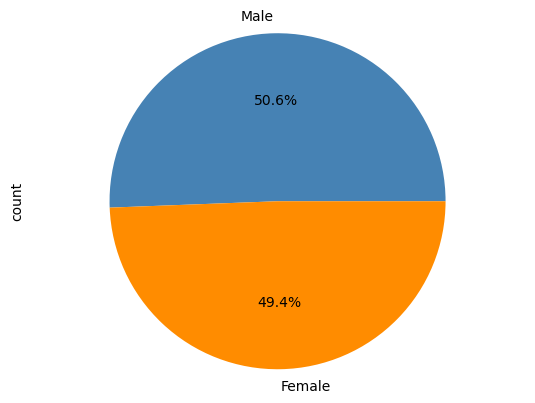

In [50]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = Mice_dup['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['steelblue','darkorange'])

plt.axis('equal')

# Display the plot
plt.show()


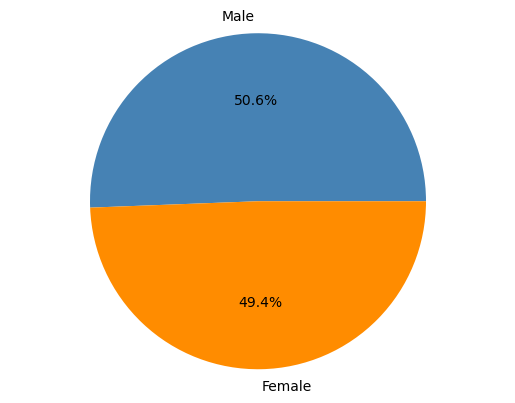

In [58]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

gender_counts = Mice_dup['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['steelblue','darkorange'])

plt.axis('equal')

plt.show()


# Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
